In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#   Noob? You're in the right place
Hey there! Even i am a beginer and in this notebook i will easily explain all the concepts 

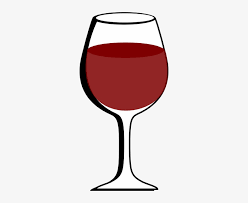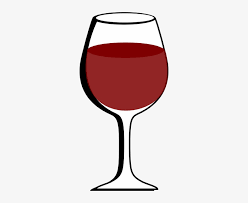

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import missingno as msno

In [ ]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# Exploratory data analysis
let's dive into the data

In [ ]:
data.head()

In [ ]:
data.info()

Great! All of our columns are float64 so no conversion needed

In [ ]:
data.isna().sum()

YESSSSS!!!! NO MISSING VALUES

In [ ]:
#looking for missing values
msno.matrix(data)

Using the **missingno** library, we can visualise this . BAM! All black as we have 0 missing values

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=data['quality'],palette='muted')

most of our wine seems average with less than 50 wines which are high quality

# Correlation

In [ ]:
data.corr()['quality'].sort_values(ascending=False)

* residual sugar correlation is almost zero so i might drop it.
* Alcohol has high correlation so it might have a big effect on quality

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = data,palette='pastel')
plt.subplot(1,2,2)
sns.barplot(x = 'quality', y = 'alcohol', data = data,palette='pastel')
plt.tight_layout()


1.  No clear insight how acidity affects quality
2. Alcohol content increases , quality of wine bumps

# Transforming target variable
1. Any wine with quality>6.5 is classified as good
2. Other classifed as bad

In [ ]:
data['quality']=[1 if i >6.5 else 0 for i in data['quality']]
data['quality'].value_counts()

In [ ]:
sns.histplot(data['alcohol'],palette='dark')

# Outliers
1. As a begineer, remember that KNN is affected by outliers more, hence it is sometimes optimal to remove them.
2. I will use Z-score to determine the outliers.

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=data['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(x=data['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x=data['citric acid'])
plt.subplot(2,2,4)
sns.boxplot(x=data['fixed acidity'])

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=data['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(x=data['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=data['density'])
plt.subplot(2,2,4)
sns.boxplot(x=data['chlorides'])

# Total sulfur dioxide has some values very far .

* # Z -score
1. In simple terms, Z score is the number of standard deviations an observation is away from the mean.
2. Formula = (observation-mean)/std
3. Removing outliers from citric acid

In [ ]:
data['zscore']=((data['citric acid']-data['citric acid'].mean())/data['citric acid'].std())
filt=np.abs(data['zscore'])<3
data=data[filt]

# similarly the outliers in alcohol and total sulphur dioxide must be removed.

In [ ]:
data['zscore2']=((data['alcohol']-data['alcohol'].mean())/data['alcohol'].std())
filt=np.abs(data['zscore2'])<3
data=data[filt]
data['zscore3']=((data['total sulfur dioxide']-data['total sulfur dioxide'].mean())/data['total sulfur dioxide'].std())
filt=np.abs(data['zscore3'])<3
data=data[filt]

#  Model 

In [ ]:
X=data.drop(['quality','zscore','zscore2','free sulfur dioxide','zscore3'],axis=1)
y=data['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)

1. Using 80% data to train and 20% to test.

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_train=scaling.fit_transform(X_train)
x_test=scaling.fit_transform(X_test)

1. Scaling data is important in an algorithm like KNN.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

#  Decision tree classifier

In [ ]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

# Support Vector Machine

In [ ]:
model=SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

# KNN
1. Finding the optimum number of neighbors

In [ ]:
for i in range(1,40):
    model=KNeighborsClassifier( n_neighbors=i,metric='manhattan')
    model.fit(x_train,y_train)
    print(i+model.score(x_test,y_test))

Turns out k=8 is optimal.

In [ ]:
model=KNeighborsClassifier( n_neighbors=8,metric='manhattan')
model.fit(x_train,y_train)
model.score(x_test,y_test)

# ~ 90% accuracy